## Using streamz, a control flow handler for pipelines

In [7]:
from streamz.dataframe import Random, StreamingDataFrame

,x,y,z
2017-12-24 23:48:22.076297216,-138.173285,20711.0,-20432.219146
2017-12-24 23:48:22.081297216,-137.699240,20712.5,-20432.450693
2017-12-24 23:48:22.086297216,-137.587513,20714.0,-20433.799138
2017-12-24 23:48:22.091297216,-137.363867,20714.5,-20434.599873
2017-12-24 23:48:22.096297216,-137.141167,20714.0,-20434.365947


In [8]:
source = Random(freq='5ms', interval='100ms')
sdf = (source-0.5).cumsum()
# sdf.tail()

,x,y,z
2017-12-24 23:48:23.029438144,-134.429063,20799.5,-20534.469204
2017-12-24 23:48:23.034438144,-134.105244,20801.0,-20535.569302
2017-12-24 23:48:23.039438144,-134.423653,20801.5,-20535.318358
2017-12-24 23:48:23.044438144,-134.247740,20803.0,-20537.753729
2017-12-24 23:48:23.049438144,-134.068247,20804.5,-20537.549857


In [11]:
p = StreamingDataFrame({'raw':sdf.x, 'smooth': sdf.x.rolling('100ms').mean(), 'very-smooth':sdf.x.rolling('500ms').mean()}).plot(width=700)

Loading BokehJS ...

In [38]:

import requests
import json
import pandas as pd

In [30]:
r1 = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')

In [31]:
r2 = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json')

In [32]:
json.loads(r1.content)['bpi']

{u'EUR': {u'code': u'EUR',
  u'description': u'Euro',
  u'rate': u'11,623.5197',
  u'rate_float': 11623.5197,
  u'symbol': u'&euro;'},
 u'GBP': {u'code': u'GBP',
  u'description': u'British Pound Sterling',
  u'rate': u'10,296.0538',
  u'rate_float': 10296.0538,
  u'symbol': u'&pound;'},
 u'USD': {u'code': u'USD',
  u'description': u'United States Dollar',
  u'rate': u'13,770.9638',
  u'rate_float': 13770.9638,
  u'symbol': u'&#36;'}}

In [33]:
json.loads(r2.content)['bpi']

{u'2017-11-24': 8201.4613,
 u'2017-11-25': 8763.785,
 u'2017-11-26': 9326.5888,
 u'2017-11-27': 9739.055,
 u'2017-11-28': 9908.2288,
 u'2017-11-29': 9816.3475,
 u'2017-11-30': 9916.5363,
 u'2017-12-01': 10859.5625,
 u'2017-12-02': 10895.0138,
 u'2017-12-03': 11180.8875,
 u'2017-12-04': 11616.855,
 u'2017-12-05': 11696.0583,
 u'2017-12-06': 13708.9913,
 u'2017-12-07': 16858.02,
 u'2017-12-08': 16057.145,
 u'2017-12-09': 14913.4038,
 u'2017-12-10': 15036.9563,
 u'2017-12-11': 16699.6775,
 u'2017-12-12': 17178.1025,
 u'2017-12-13': 16407.2025,
 u'2017-12-14': 16531.0838,
 u'2017-12-15': 17601.9438,
 u'2017-12-16': 19343.04,
 u'2017-12-17': 19086.6438,
 u'2017-12-18': 18960.5225,
 u'2017-12-19': 17608.35,
 u'2017-12-20': 16454.7225,
 u'2017-12-21': 15561.05,
 u'2017-12-22': 13857.145,
 u'2017-12-23': 14548.71,
 u'2017-12-24': 13975.4363}

In [34]:
r3 = requests.get('https://apiv2.bitcoinaverage.com/indices/global/history/BTCUSD?period=daily&?format=json')

In [62]:
j3 = json.loads(r3.content)

In [63]:
pricing_times = []
pricing_values = []
for item in j3:
    pricing_times.append(item['time'])
    pricing_values.append(item['average'])

In [71]:
pricing_window = {'time': pricing_times, 'values': pricing_values}
df = pd.DataFrame(pricing_window)

In [72]:
print(df)

                     time    values
0     2017-12-25 04:09:00  13668.26
1     2017-12-25 04:08:00  13652.27
2     2017-12-25 04:07:00  13659.01
3     2017-12-25 04:06:00  13623.84
4     2017-12-25 04:05:00  13606.67
5     2017-12-25 04:04:00  13564.78
6     2017-12-25 04:03:00  13567.05
7     2017-12-25 04:02:00  13633.30
8     2017-12-25 04:01:00  13676.11
9     2017-12-25 04:00:00  13688.48
10    2017-12-25 03:59:00  13688.48
11    2017-12-25 03:58:00  13725.69
12    2017-12-25 03:57:00  13683.05
13    2017-12-25 03:56:00  13701.35
14    2017-12-25 03:55:00  13393.59
15    2017-12-25 03:54:00  13423.41
16    2017-12-25 03:53:00  13441.20
17    2017-12-25 03:52:00  13443.63
18    2017-12-25 03:51:00  13452.58
19    2017-12-25 03:50:00  13436.52
20    2017-12-25 03:49:00  13448.46
21    2017-12-25 03:48:00  13464.25
22    2017-12-25 03:47:00  13473.80
23    2017-12-25 03:46:00  13469.30
24    2017-12-25 03:45:00  13491.92
25    2017-12-25 03:44:00  13498.68
26    2017-12-25 03:43:00  1

In [77]:
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
del df['time']
df

,values
time,
2017-12-25 04:09:00,13668.26
2017-12-25 04:08:00,13652.27
2017-12-25 04:07:00,13659.01
2017-12-25 04:06:00,13623.84
2017-12-25 04:05:00,13606.67
2017-12-25 04:04:00,13564.78
2017-12-25 04:03:00,13567.05
2017-12-25 04:02:00,13633.30
2017-12-25 04:01:00,13676.11


In [78]:
import seaborn as sns

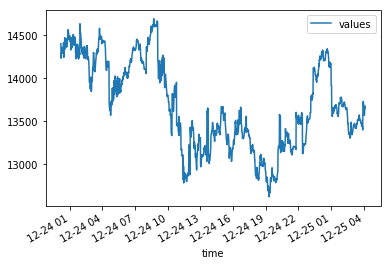

In [79]:
df.plot()

In [ ]:
df.resample